In [52]:
import fiona
import geopandas as gpd
import numpy as np
from geonamescache import GeonamesCache
import matplotlib.pyplot as plt

In [53]:
def plot_pop_map(df, name_field, counts, categorical=True, show_text=True, legend=True):
    df['counts'] = df[name_field].apply(lambda x: int(counts[x]) if x in counts else None)
    
    # to convert to ints, we will first need to get rid of NaNs
    df_pop = df.iloc[~np.isnan(df['counts'].values)]
    
    # now we can convert counts to int
    df_pop['counts'] = df_pop['counts'].values.astype('int')
    
    # plot the edges of the entire map in gray
    ax = df.plot(color='w', figsize=(20, 12), edgecolor='#aaaaaa')
    
    # plot the pops. Use categorical=True to give each number a color
    ax = df_pop.plot(column='counts', cmap='inferno_r', categorical=categorical, legend=legend, edgecolor='#aaaaaa', ax=ax)

    ax.set_axis_off()
    
    if show_text:
        
        df_pop['x'] = df_pop.geometry.apply(lambda x: x.representative_point().x)
        df_pop['y'] = df_pop.geometry.apply(lambda x: x.representative_point().y)
        
        font_dict = dict(ha='center', weight='bold')
        for i in range(len(df_pop)):
            if df_pop['counts'].iloc[i] > np.quantile(np.unique(df_pop['counts']), .6):
                font_dict.update(color='white')
            else:
                font_dict.update(color='black')
            
            ax.text(df_pop['x'].iloc[i], df_pop['y'].iloc[i],
                    '{}'.format(df_pop['counts'].iloc[i]),
                   fontdict=font_dict)
    
    return ax

In [54]:
state_input = """California


California
California

New York
New York


New York

Virginia


California

Arizona
Arizona
Oregon
California
Washington
Massachusetts
Washington
Maryland
Indiana
Arizona
Washington
California
Georgia



Washington
California
Massachusetts
California

New Jersey
Georgia

California

New Hamshire
Massachusetts
New Jersey








California
California
Washington
Washington
California

Oregon
Texas

California
California

Texas

Rhode Island




California

Massachusetts"""

country_input="""United States
Egypt
Norway
United States
United States
Brazil
United States
United States
Sudan
India
United States
Germany
United States
Canada
Canada
United States
Canada
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
United States
Canada
Canada
Sweden
United States
United States
United States
United States
Switzerland
United States
United States
United Kingdom
United States
Germany
United States
United States
United States
Mexico
Sweden
Iran
Mexico
France
Switzerland
Switzerland
France
United States
United States
United States
United States
United States
France
United States
United States
Canada
United States
United States
Canada
United States
Netherlands
United States
Switzerland
Brazil
Canada
India
United States
France
United States
France"""

In [55]:
state_locations = [x for x in state_input.split("\n") if x]
country_locations = [x for x in country_input.split("\n") if x]

In [56]:
countries = GeonamesCache().get_countries_by_names()
map_countries = countries
states = gpd.read_file('/Users/bendichter/Downloads/States 21basic/geo_export_9276820b-6dd1-43f1-9f3b-a974328ead6c.shp')
all_states = states['state_name'].tolist()

In [57]:
# convert states to USA for country list
countries = ['United States of America' if x in states['state_name'].tolist() + ['United States']
             else x.strip() 
             for x in country_locations]

country_counts = {country:np.sum(np.array(countries) == country) for country in countries}
country_counts

{'United States of America': 44,
 'Egypt': 1,
 'Norway': 1,
 'Brazil': 2,
 'Sudan': 1,
 'India': 2,
 'Germany': 2,
 'Canada': 8,
 'Sweden': 2,
 'Switzerland': 4,
 'United Kingdom': 1,
 'Mexico': 2,
 'Iran': 1,
 'France': 5,
 'Netherlands': 1}

In [58]:
state_counts = {state:np.sum(np.array(state_locations) == state) for state in locations if state in all_states}

In [59]:
state_counts

{'California': 15,
 'New York': 3,
 'Virginia': 1,
 'Arizona': 3,
 'Oregon': 2,
 'Washington': 6,
 'Massachusetts': 4,
 'Maryland': 1,
 'Indiana': 1,
 'Georgia': 2,
 'New Jersey': 2,
 'Texas': 2,
 'Rhode Island': 1}

In [60]:
countries_left_out = [c for c in country_counts if c not in map_countries]
print(countries_left_out)

states_left_out = [c for c in state_counts if c not in states['state_name'].values]
print(states_left_out)

['United States of America']
[]


In [61]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('+proj=robin')
world = world[world.name != 'Antarctica']

/Users/bendichter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/bendichter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/bendichter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

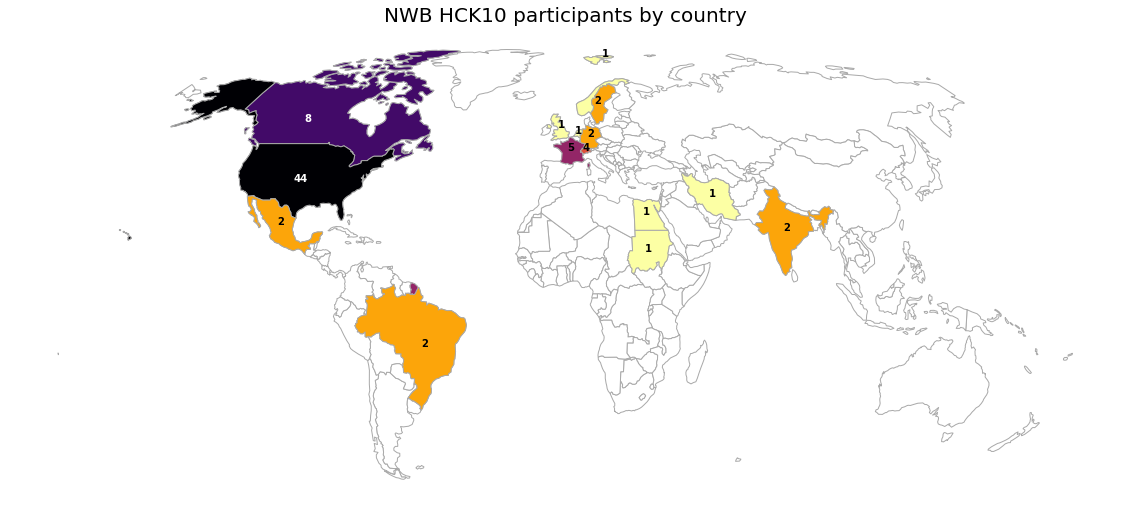

In [62]:
ax = plot_pop_map(world, 'name', country_counts, legend=False)
_ = ax.set_title('NWB HCK10 participants by country', fontdict={'fontsize': 20})
ax
plt.savefig('hck10_world.pdf', bbox_inches='tight')

In [63]:
states = states[states.state_name != 'Hawaii']
states = states[states.state_name != 'Alaska']

/Users/bendichter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/bendichter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/bendichter/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

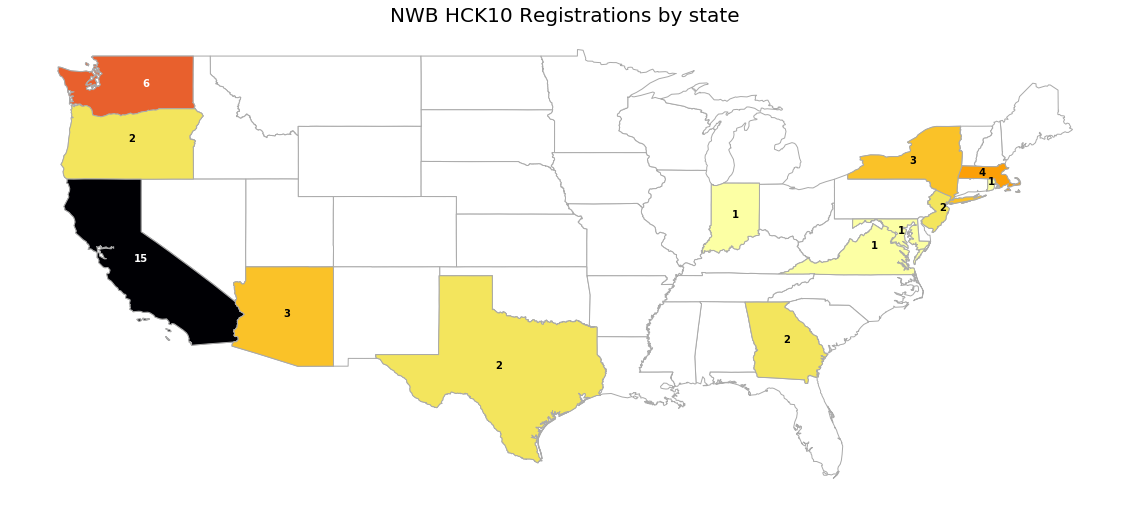

In [64]:
ax = plot_pop_map(states, 'state_name', state_counts, categorical=False,  legend=False)
ax.set_title('NWB HCK10 Registrations by state', fontdict={'fontsize': 20})

plt.savefig('hck10_usa.pdf', bbox_inches='tight')

In [66]:
times_txt = """2/25/2020 13:55:50
2/27/2020 7:52:03
2/27/2020 10:40:00
3/2/2020 8:33:37
3/4/2020 10:22:51
3/6/2020 6:15:27
4/23/2020 4:50:44
4/13/2020 18:20:50
4/13/2020 18:28:43
4/13/2020 18:35:10
4/13/2020 18:39:42
4/13/2020 19:12:36
4/13/2020 19:25:44
4/13/2020 21:08:35
4/13/2020 21:23:52
4/13/2020 23:26:36
4/14/2020 0:36:38
4/14/2020 1:27:00
4/14/2020 1:43:45
4/14/2020 2:14:07
4/14/2020 2:40:01
4/14/2020 4:12:10
4/14/2020 5:57:07
4/14/2020 6:01:21
4/14/2020 6:11:20
4/14/2020 6:37:25
4/14/2020 6:39:10
4/14/2020 7:37:46
4/14/2020 8:57:55
4/14/2020 8:58:59
4/14/2020 9:19:56
4/14/2020 10:03:16
4/14/2020 10:41:55
4/14/2020 11:56:16
4/14/2020 12:27:27
4/14/2020 13:45:18
4/14/2020 14:55:19
4/14/2020 17:31:57
4/14/2020 17:57:25
4/14/2020 18:28:14
4/14/2020 18:40:55
4/14/2020 18:43:46
4/14/2020 20:17:58
4/15/2020 1:51:21
4/15/2020 4:58:02
4/15/2020 7:04:23
4/15/2020 7:09:41
4/15/2020 7:31:24
4/15/2020 9:43:01
4/15/2020 12:42:24
4/15/2020 14:09:34
4/15/2020 15:30:45
4/15/2020 21:58:54
4/16/2020 1:07:22
4/16/2020 7:12:45
4/16/2020 8:15:40
4/16/2020 17:24:49
4/16/2020 12:00:52
4/16/2020 15:47:55
4/16/2020 19:39:26
4/16/2020 21:41:40
4/17/2020 12:12:43
4/17/2020 13:29:08
4/17/2020 13:32:32
4/20/2020 6:38:03
4/20/2020 8:56:19
4/21/2020 2:15:58
4/21/2020 3:51:57
4/21/2020 18:23:14
4/22/2020 6:14:05
4/22/2020 7:16:45
4/22/2020 7:46:21
4/22/2020 8:10:18
4/22/2020 10:57:54
4/22/2020 16:28:06
4/23/2020 10:05:12
4/23/2020 12:56:16
4/23/2020 13:07:33
4/23/2020 23:25:44
4/24/2020 5:03:44
4/24/2020 19:14:08
4/25/2020 19:58:56
4/26/2020 8:16:23
4/27/2020 1:11:44
4/27/2020 6:19:27
4/27/2020 11:32:50
4/27/2020 11:35:44
4/27/2020 11:54:36
4/27/2020 15:03:24
4/27/2020 18:08:58
4/27/2020 18:12:29
4/27/2020 18:21:50
4/27/2020 21:16:13
4/27/2020 23:33:13
4/28/2020 9:54:21
4/28/2020 15:39:29
4/28/2020 17:45:37
4/29/2020 2:39:29
4/29/2020 6:37:13
4/29/2020 8:51:43
4/29/2020 10:28:51
4/29/2020 15:32:58
4/29/2020 15:54:49
4/30/2020 13:00:51
5/1/2020 6:31:10
5/1/2020 9:27:06
5/1/2020 10:31:43
5/1/2020 13:36:34
5/1/2020 17:33:06
5/1/2020 18:18:28
5/2/2020 2:27:02
5/2/2020 12:42:04
5/2/2020 18:22:53
5/3/2020 6:50:08
5/4/2020 3:22:26
5/4/2020 9:37:10
5/5/2020 4:10:23
5/5/2020 6:02:47
5/5/2020 8:46:27
5/5/2020 9:11:14
5/5/2020 9:40:01
5/5/2020 16:55:25
5/5/2020 17:02:26
5/5/2020 20:59:14
5/6/2020 1:01:39
5/6/2020 2:52:59
5/6/2020 6:57:48
5/6/2020 7:42:08
5/6/2020 9:09:22
5/6/2020 9:16:21
5/6/2020 9:43:30
5/6/2020 11:31:53
5/6/2020 11:51:26
5/6/2020 15:49:21
5/6/2020 16:16:19
5/6/2020 16:55:32
5/6/2020 17:29:29
5/6/2020 18:01:40
5/6/2020 19:35:04
5/6/2020 20:08:20
5/6/2020 20:08:44
5/6/2020 21:04:16
5/6/2020 21:23:58
5/7/2020 5:29:58
5/7/2020 6:39:08
5/7/2020 7:49:04
5/7/2020 11:31:07
5/7/2020 15:17:13
5/7/2020 15:00:51
5/7/2020 17:21:41
5/7/2020 18:56:22
5/7/2020 19:34:16
5/8/2020 9:42:41
5/8/2020 12:22:00
5/8/2020 12:22:30
5/8/2020 12:40:34
5/8/2020 14:00:53
5/8/2020 14:22:19
5/8/2020 15:00:09
5/8/2020 15:56:23
5/8/2020 18:09:49
5/8/2020 21:17:51
5/9/2020 13:25:49
5/9/2020 15:13:44
5/9/2020 17:51:47
5/9/2020 18:01:52
5/10/2020 4:02:04
5/10/2020 4:42:42
5/10/2020 4:47:27
5/10/2020 5:30:00
5/10/2020 9:24:38
5/10/2020 23:05:02
5/11/2020 1:40:28
5/11/2020 3:21:06
5/11/2020 5:56:15
5/11/2020 5:56:42
5/11/2020 5:58:26
5/11/2020 6:16:48
5/11/2020 6:43:51
5/11/2020 8:22:46
5/11/2020 8:50:23
5/11/2020 9:22:08
5/11/2020 9:27:50
5/11/2020 9:28:56
5/11/2020 10:23:49
5/11/2020 10:48:12
5/11/2020 10:54:41
5/11/2020 11:16:02
5/11/2020 11:20:08
5/11/2020 11:43:43
5/11/2020 11:44:03
5/11/2020 11:51:32
5/11/2020 12:44:14
5/11/2020 12:45:37
5/11/2020 13:17:24
5/11/2020 13:17:34
5/11/2020 13:22:20
5/11/2020 13:44:36
5/11/2020 14:20:32
5/11/2020 14:55:44
5/11/2020 16:11:23
5/11/2020 16:17:37
5/11/2020 16:34:31
5/11/2020 19:14:36
5/11/2020 21:11:12
5/11/2020 21:20:42
5/11/2020 23:41:40
5/11/2020 23:44:22
5/12/2020 0:22:42
5/12/2020 0:57:04
5/12/2020 1:06:55
5/12/2020 2:09:47
5/12/2020 2:45:39
5/12/2020 2:54:50
5/12/2020 4:08:17
5/12/2020 5:00:37
5/12/2020 6:03:47
5/12/2020 6:04:45
5/12/2020 6:11:53
5/12/2020 6:43:38
5/12/2020 7:14:00
5/12/2020 8:09:48
5/12/2020 8:31:26
5/12/2020 8:32:04
5/12/2020 8:40:20
5/12/2020 8:42:41
5/12/2020 8:44:16
5/12/2020 8:50:54
5/12/2020 8:54:55
5/12/2020 9:07:04
5/12/2020 9:34:17
5/12/2020 9:39:34
5/12/2020 10:25:59
5/12/2020 10:56:07
5/12/2020 12:54:19
5/12/2020 14:33:05
5/13/2020 1:01:50
5/13/2020 7:19:48
5/13/2020 9:56:42
5/13/2020 10:20:36
5/13/2020 10:38:16
5/13/2020 23:09:08"""

/Users/bendichter/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


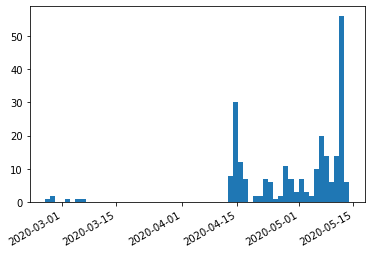

In [67]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.hist([datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in times_txt.split("\n")], 60)

ax.fmt_xdata = mdates.DateFormatter('%d')
ax


In [68]:
times = [datetime.datetime.strptime(x, '%m/%d/%Y %H:%M:%S') for x in times_txt.split("\n")]
times = sorted(times)

In [69]:
np.cumsum(np.ones_like(times)).astype(int)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

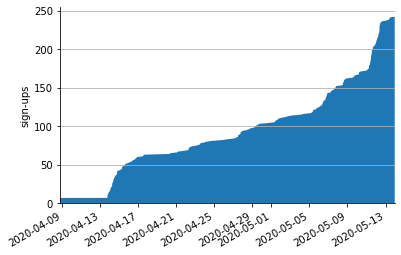

In [70]:
from datetime import timedelta
import seaborn as sns

fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.fill_between(times, np.cumsum(np.ones_like(times)).astype(int))
ax.set_xlim([times[7] - timedelta(days=5), max(times)])
ax.set_ylim((0, None))
ax.set_ylabel('sign-ups')
sns.despine(ax=ax)
ax.grid(axis='y')